# Yêu cầu:
1. Đọc bộ dataset nằm trong folder data/eigenface_data
2. Sử dụng Eigenface xây dựng mô hình nhận diện gương mặt
3. Tính mean face, random face
4. Report độ chính xác và đánh giá

## Exercise. How do we do Face Recognition In the Past??
## >> Using EigenFace

### 1. Import data

In [2]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Read face image from zip file on the fly
faces = {}
for folder in os.listdir("eigenface_data"):
    for img in os.listdir("eigenface_data/"+folder):
        img_path  = "eigenface_data/"+folder+"/"+img
        faces[img_path] = cv2.imread(img_path,cv2.IMREAD_GRAYSCALE)

Showing sample faces


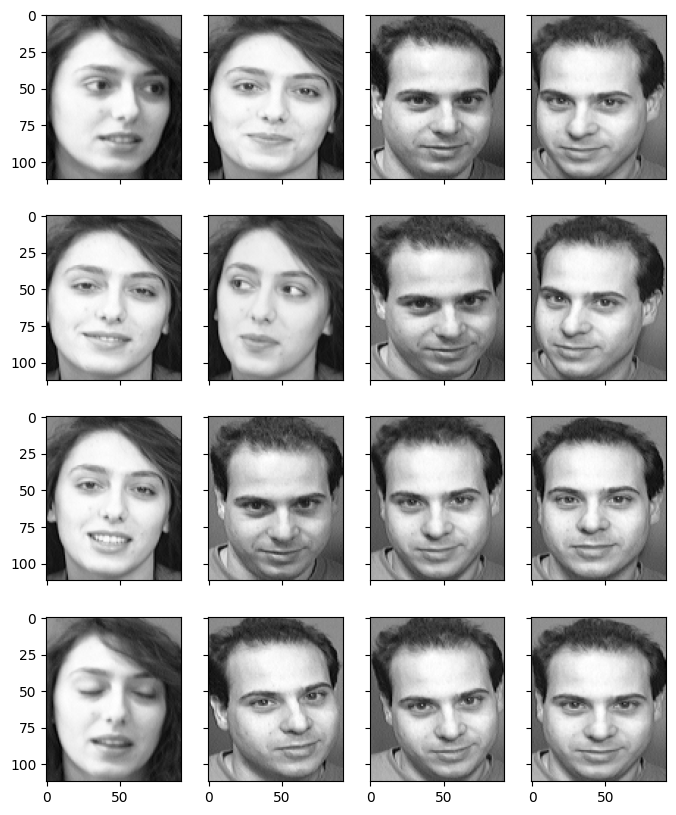

In [3]:
# Show sample faces using matplotlib
fig, axes = plt.subplots(4,4,sharex=True,sharey=True,figsize=(8,10))
faceimages = list(faces.values())[-16:] # take last 16 images
for i in range(16):
    axes[i%4][i//4].imshow(faceimages[i], cmap="gray")
print("Showing sample faces")
plt.show()

In [4]:
# Print some details
faceshape = list(faces.values())[0].shape
print("Face image shape:", faceshape)

classes = set(filename.split("/")[1] for filename in faces.keys())
print("Number of classes:", len(classes))
print("Number of images:", len(faces))

Face image shape: (112, 92)
Number of classes: 40
Number of images: 400


## 2. Train test split

In [5]:
classes = list(filename.split("/")[1] for filename in faces.keys())


In [6]:
import pandas as pd
data = pd.DataFrame({'image':list(faces.keys()),'label':classes})

#### Take 1 row of each group to become the test set

In [7]:
X_test = data.groupby('label').nth(0)

In [8]:
X_test

,image
label,
s1,eigenface_data/s1/1.pgm
s10,eigenface_data/s10/1.pgm
s11,eigenface_data/s11/1.pgm
s12,eigenface_data/s12/1.pgm
s13,eigenface_data/s13/1.pgm
s14,eigenface_data/s14/1.pgm
s15,eigenface_data/s15/1.pgm
s16,eigenface_data/s16/1.pgm
s17,eigenface_data/s17/1.pgm


In [9]:
X_test.label.unique()

AttributeError: 'DataFrame' object has no attribute 'label'

In [10]:
len(X_test.label.unique())

AttributeError: 'DataFrame' object has no attribute 'label'

In [12]:
train_index = np.array(set(data.index)-set(X_test.index))
X_train = data.loc[train_index,:]

In [13]:
X_train

,image,label
0,eigenface_data/s1/1.pgm,s1
1,eigenface_data/s1/10.pgm,s1
2,eigenface_data/s1/2.pgm,s1
3,eigenface_data/s1/3.pgm,s1
4,eigenface_data/s1/4.pgm,s1
...,...,...
395,eigenface_data/s9/5.pgm,s9
396,eigenface_data/s9/6.pgm,s9
397,eigenface_data/s9/7.pgm,s9
398,eigenface_data/s9/8.pgm,s9


## 3. Do the eigenFace

In [14]:
face_matrix = []
for img in X_train.image.to_list():
    face_matrix.append(faces[img].flatten())

In [15]:
face_matrix = np.array(face_matrix)


In [16]:
face_matrix.shape

(400, 10304)

In [17]:
# Apply PCA and take first K principal components as eigenfaces
from sklearn.decomposition import PCA

pca = PCA().fit(face_matrix)
n_components = 50
eigenfaces = pca.components_[:n_components]

Showing the eigenfaces


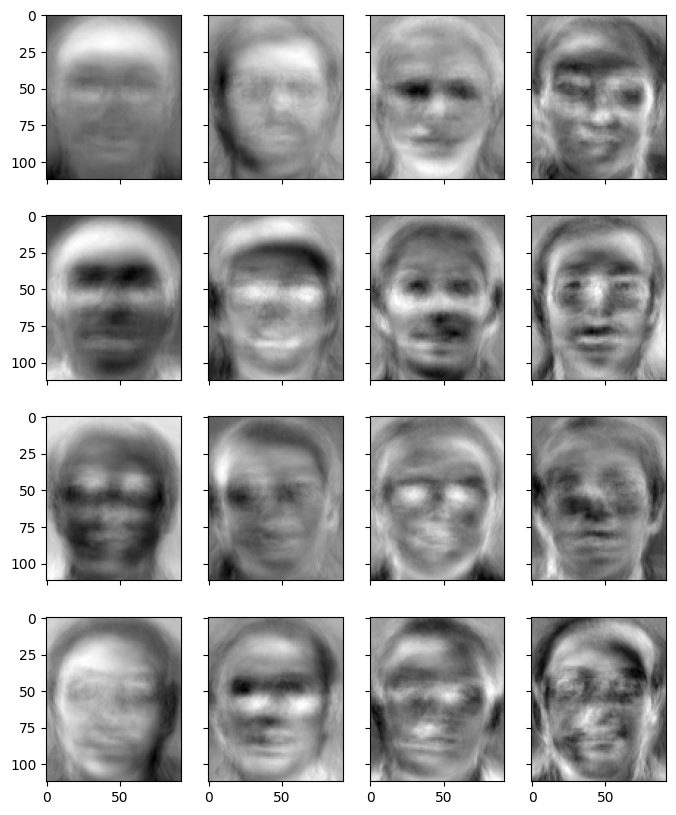

In [18]:
# Show the first 16 eigenfaces
fig, axes = plt.subplots(4,4,sharex=True,sharey=True,figsize=(8,10))
for i in range(16):
    axes[i%4][i//4].imshow(eigenfaces[i].reshape(faceshape), cmap="gray")
print("Showing the eigenfaces")
plt.show()

## 4. Reconstruct Faces using PCA

In [19]:
weights = eigenfaces @ (face_matrix - pca.mean_).T
print("Shape of the weight matrix:", weights.shape)

Shape of the weight matrix: (50, 400)


## 5. Perform Test

In [20]:
test_labels = X_test.label.to_list()
train_labels = X_train.label.to_list()
predictions = []
for img in X_test.image.to_list():
    query = faces[img].reshape(1,-1) #reshape and get the current query face
    query_weight = eigenfaces @ (query - pca.mean_).T
    euclidean_distance = np.linalg.norm(weights - query_weight, axis=0)
    best_match = np.argmin(euclidean_distance)
    predictions.append(train_labels[best_match])


AttributeError: 'DataFrame' object has no attribute 'label'

NameError: name 'query' is not defined

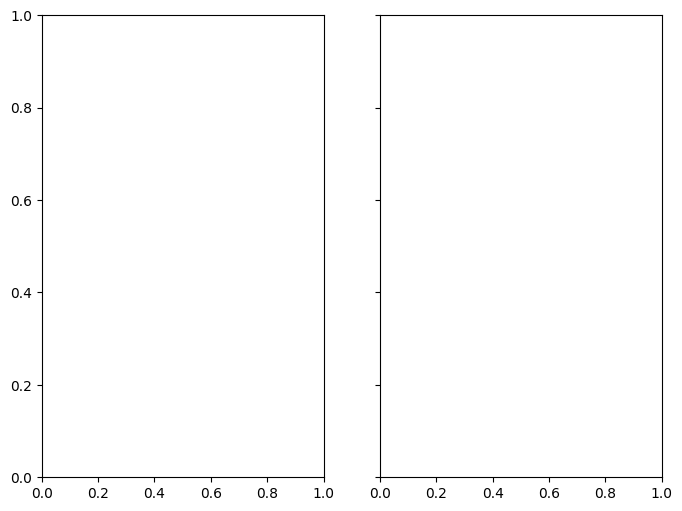

In [21]:
fig, axes = plt.subplots(1,2,sharex=True,sharey=True,figsize=(8,6))
axes[0].imshow(query.reshape(faceshape), cmap="gray")
axes[0].set_title("Query")
axes[1].imshow(face_matrix[best_match].reshape(faceshape), cmap="gray")
axes[1].set_title("Best match")
plt.show()

In [ ]:
print(rp(test_labels,predictions))

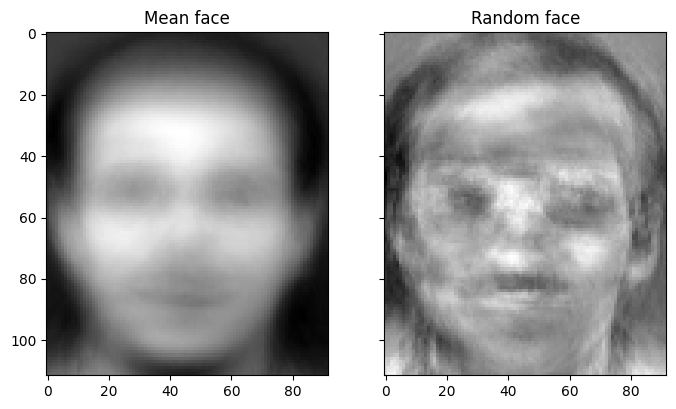

In [22]:
...
# Visualize the mean face and random face
fig, axes = plt.subplots(1,2,sharex=True,sharey=True,figsize=(8,6))
axes[0].imshow(pca.mean_.reshape(faceshape), cmap="gray")
axes[0].set_title("Mean face")
random_weights = np.random.randn(n_components) * weights.std()
newface = random_weights @ eigenfaces + pca.mean_
axes[1].imshow(newface.reshape(faceshape), cmap="gray")
axes[1].set_title("Random face")
plt.show()